In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Mérés ultrahang radarral
## 1. feladat: A hangsebesség közelítő meghatarozása
Egy arra alkalmas négyszög jel (ún. trigger) gerjeszti az ultrahangot kibocsátó piezzo-kristályt. 
A gerjesztés hatására egy csirip keletkezik, ami tovaterjed, majd visszaverődés után detektálható.
Vizsgálja meg a csirip és a visszavert jel alakjait oszcilloszkóp segítségével! 
Mérje meg, hogy mennyi idő telik el a triggerjel és a visszavert jel között. 
Első közelítésben feltéve, hogy a rendszer késleltetése elhanyagolható, a mért idő és a visszaverő felület távolságának ismeretében határozza meg a hangsebességet! 
*Megjegyzés:* adja meg a képletet, ami alapján számol és ne feledkezzen meg a hibák becsléséről sem!

* **A mért időkülönbség, $t = (0.021 \pm 0.0005)\ s$**

Lemért távolságok:
* Radartálca és a káosznál levő fal merőleges távolsága: $F = (351 \pm 0.5)\ cm$
* A jelforrás és a tálca távolsága: $T = (20 \pm 0.5)\ cm$
* **A visszaverő felület távolsága, $L = 2 \cdot F + 3 \cdot (T) = 762 \ cm = (7.22 \pm 0.005)\ m$**
* **A hangsebesség közelítő értéke, $c = \frac{L}{t} = \frac{7.62}{0.021}\ \frac{m}{s} = 362.857\ \frac{m}{s}$**

A jelek közti időt Audacity-vel mértem.

* t abszolút hibája: $0.0005\ s$
* s abszolút hibája: $0.5\ cm$

In [13]:
2 * 351 + 3*20

762

In [15]:
(762/100)/0.021

362.85714285714283

## 2. feladat: A radar kalibrációja és a hangsebesség pontosabb meghatározása
A jel kibocsátása és visszaverődése között eltelt idő pontosabb meghatározására a hullámalakokat a számítógép hangkártyájával digitalizáljuk.
A radart állítsa egy-egy adott, jól visszaverő irányba! 
*Javaslat:* közeli falakra merőleges és a sarkokat célzó nyalábok jól detektálhatóak.
Vegyen fel kb. fél másodpercnyi jelet, 44,1 _kHz_ mintavételi frekvenciával egy arra alkalmas program az `audacity` segítségével.
A mintában keresse meg a visszhang helyét!
*Javaslat:* mérje meg, a hogy visszhang hány mintával később érkezik, mint a triggerjel eleje, és a különbségből következtessen az eltelt időre.
A mérési adatokat gyűjtse táblázatba, ábrázolja azokat és illesszen rájuk egyenest.

|Mérés száma | Visszaverő felület távolsága | Visszhangjel ideje |
|------------|------------------------------|--------------------|
|1           |           $762\ cm$          |      $0.021\ s$    |
|2           |           $580\ cm$          |      $0.018\ s$    |
|3           |           $592\ cm$          |      $0.018\ s$    |
|4           |           $904\ cm$          |      $0.027\ s$    |
|5           |           $856\ cm$          |      $0.026\ s$    |
|6           |           $ . \ cm$          |      $ .   \ s$    |

In [26]:
4*(130+69) + 60

856

In [ ]:
# ábrázolás és illesztés

In [36]:
from scipy import stats

In [95]:
time = np.array((0.018,0.018,0.021,0.026,0.027))
distance = np.array((5.80,5.92,7.62,8.56,9.04))

slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(time, distance)
line_1 = slope_1*time+intercept_1

In [96]:
print("slope:", slope_1,
      "\nintercept:", intercept_1,
      "\nr_value:", r_value_1,
      "\np_value:", p_value_1,
      "\nstd_err:", std_err_1)

slope: 337.02702702702703 
intercept: -0.026594594594594234 
r_value: 0.9754827428589748 
p_value: 0.00459132519344797 
std_err: 43.89924715365182


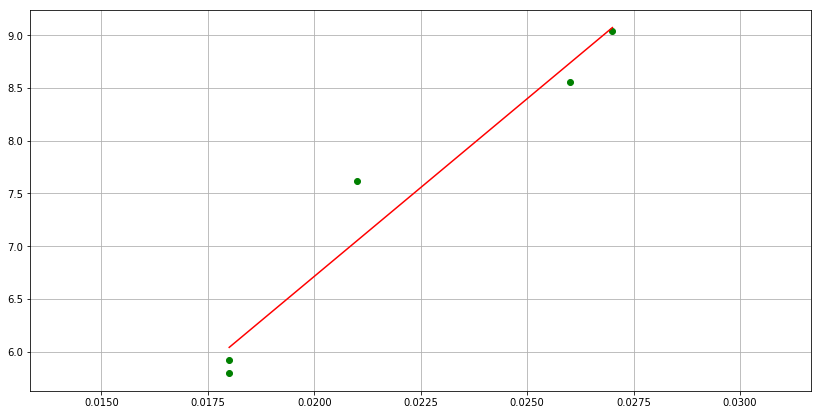

In [97]:
fig_1, axes_1 = plt.subplots(figsize=(14,7))

axes_1.scatter(time, distance, c="green")
axes_1.plot(time, line_1, c="red")

plt.grid()
plt.show()

Az egyenes paramétereiből határozza meg a rendszer késleltetését és a hangsebességet.
* Az illesztett egyenes egyenlete: $337.03 \cdot T - 0.027$
* A hangsebesség értéke az illesztésből: $337.03 \frac{m}{s}$
* A rendszer késleltetése: $$

## 3. feladat: A visszavert jel intenzitásának szögfüggése
Válasszon ki egy jól visszaverő közeli falfelületet. 
A léptetőmotort egyenként léptetve, tapogassa le a falat.
_Figyelem:_ mivel csak egy irányba lehet léptetni a motorral, ezért figyeljen oda, hogy még a merőleges irány _előtti_ pontból indÍtsa a mérést.
Egy-egy rögzített irányban a mérés bizonytalansága nagy, akár 20-30%-t is szór csiripenként az amplitudó maximuma a keverőjel fázisától függően. 
*Javaslat:* érdemes tehát mindegyik irányban megnézni, hogy több visszaverődés közül mekkora a jel legnagyobb értéke.

A mérési adatokra illesszen Gauss-függvényt. 
*Megjegyzés:* a radar kb. 400 lépésben ér körbe.

|Mérés száma | Elfordulás | Amplitúdó |
|------------|------------|-----------|
|     1      |     0°     |   0.145   |
|     2      |    2.7°    |   0.150   |
|     3      |    10.8°   |   0.215   |
|     4      |    16.2°   |   0.130   |
|     5      |    43.2°   |   0.350   |
|     6      |    44.1°   |   0.460   |
|     7      |    45.0°   |   0.520   |
|     8      |    45.9°   |   0.330   |
|     9      |    46.8°   |   0.170   |
|    10      |    47.7°   |   0.100   |
|    11      |    49.5°   |   0.080   |

In [ ]:
# ábrázolás és illesztés

In [122]:
import scipy

In [98]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [99]:
x = angle = np.array((43.2,44.1,45.0,45.9,46.8,47.7,49.5))
y = amplitude = np.array((0.350,0.460,0.520,0.330,0.170,0.10,0.080))

In [100]:
n = len(x)
mean = sum(x*y)/n
sigma = sum(y*(x-mean)**2)/n

def gauss(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gauss,x,y,p0=[1,mean,sigma])

In [106]:
print("sigma:", sigma)
print("\npopt:\n", popt)
print("\npcov:\n", pcov)

sigma: 297.38124119886294

popt:
 [ 0.5016463  44.56885069 -1.58981695]

pcov:
 [[0.00122391 0.00092286 0.00374971]
 [0.00092286 0.02359545 0.01160815]
 [0.00374971 0.01160815 0.03153599]]


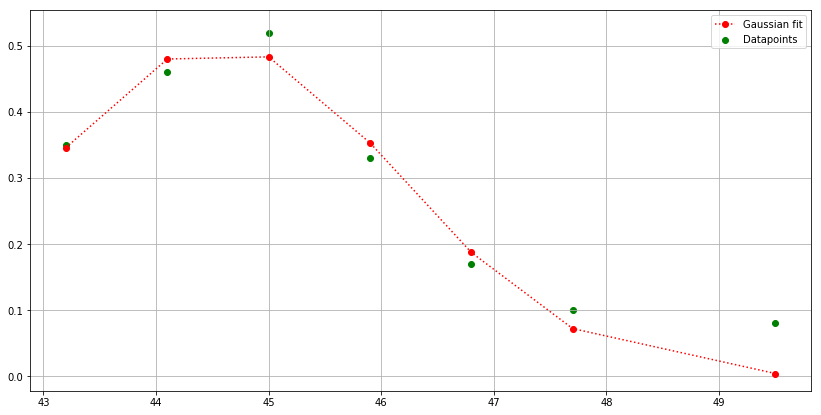

In [103]:
fig_2, axes_2 = plt.subplots(figsize=(14,7))

axes_2.scatter(angle, amplitude, c="green", label="Datapoints")
axes_2.plot(x,gauss(x,*popt),'ro:', label="Gaussian fit")

plt.legend()
plt.grid()
plt.show()

## ábrázolás és illesztés

* Az illesztett modell egyenlete: $a \cdot e^{\tfrac{-(x-x_{0})^{2}}{\left( 2 \cdot \sigma^{2} \right)}}$
* Az illesztés paramétereinek értéke:
* Ebből a szögfelbontás értéke (a Gauss-görbe szórása):

## 4. feladat: A csirip spektrumának vizsgálata
A rögzített adatokból emelje ki egy visszavert jel hullámcsomagját és végezze el a Fourier-transzformációját. 
A hullámcsomag Fourier-spektruma jellegzetes maximummal rendelkezik.
*Megjegyzés:* több visszavert hullámcsomagból ügyes szerkesztéssel pontosabb eredményre juthat.
Mekkora frekvenciánál van ez a maximum, és mekkora a jel sávszélessége.
*Megjegyzés:* sávszélesség alatt a maximumhoz képest -3 dB esést felölelő tartományt értjük.

* A spektrum maximuma, $f=2750\ Hz$
* Az alsó sávhatár, $f_\mathrm{min}=$
* A felső sávhatár, $f_\mathrm{max}=$
* A jel sávszélessége, $C=$

In [125]:
[freq, D] = scipy.io.wavfile.read("csomag.wav")

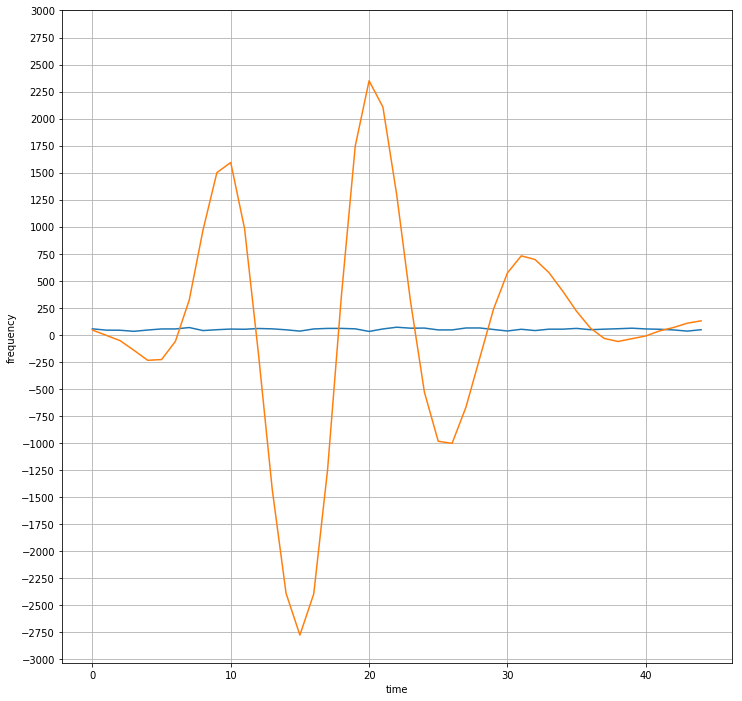

In [153]:
plt.plot(D)
plt.yticks(np.arange(-3000, 3250, step=250))

plt.xlabel("time")
plt.ylabel("frequency")

plt.grid()
plt.show()

In [134]:
out = numpy.fft.fft(D)

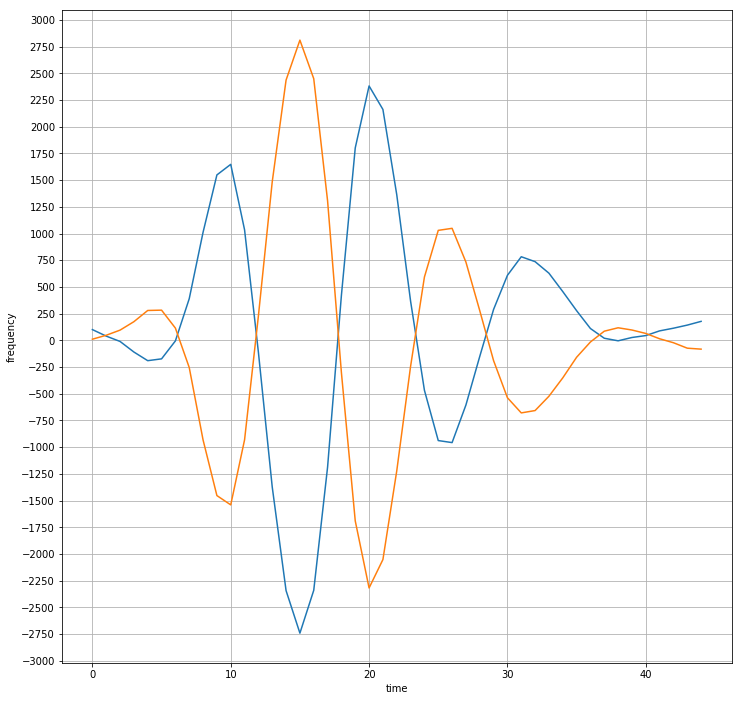

In [151]:
plt.plot(out.real)
#plt.xscale("log")
plt.yticks(np.arange(-3000, 3250, step=250))

plt.xlabel("time")
plt.ylabel("frequency")

plt.grid()
plt.show()

## 5. feladat: Speciális szórócentrumok visszaverőképességének vizsgálata
Mérje meg különböző geometriájú visszaverő objektum, (így a gömb, a sík (0$^\circ$ és 45$^\circ$), a saroktükör (két állása) és az érdes felület) relatív visszaverőképességét.
Tekintse egységnyinek a 90$^\circ$ álló síkfelületet (maximális visszaverőképesség). 

A vizsgált szórócentrumok relatív visszaverőképességét adja meg egy táblázatban!

Hogyan korrigálná a mérési adatokat, ha a szórófelületet nem tudja mindig ugyanúgy egység távolra elhelyezni? 

## 6. feladat: A terem alaprajzának analízise
Rögzítse a mintasorozatot, miközben a radar legalább egy teljes kört bejár. 
A mellékelt szkript segítségével szerkessze meg a visszaverődési pontok lenyomatát és értelmezze a kapott képet.
Diszkutálja a kapott képet.

In [107]:
from feldolgoz import radar_korkep

In [115]:
t = radar_korkep("./korkep.wav")

/home/uxb26i/workdir/uradar/feldolgoz.py:26: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  pos_naive = find( Dd > trig_thresh * max(Dd) )


Mintaszam:	424
Mintahossz:	4449.357311

A zaj vagasa: 95149.845285



/home/uxb26i/workdir/uradar/feldolgoz.py:55: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  Jc[find(Jc <= noise_thresh)] = 0
/home/uxb26i/workdir/uradar/feldolgoz.py:64: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  place = min(find(myslice > 0))


In [190]:
time_t = np.empty(len(t))

for i in range(0,len(t)):
    time_t[i] = t[i][0]
    
data = np.empty(len(t))

for i in range(0,len(t)):
    data[i] = t[i][2]

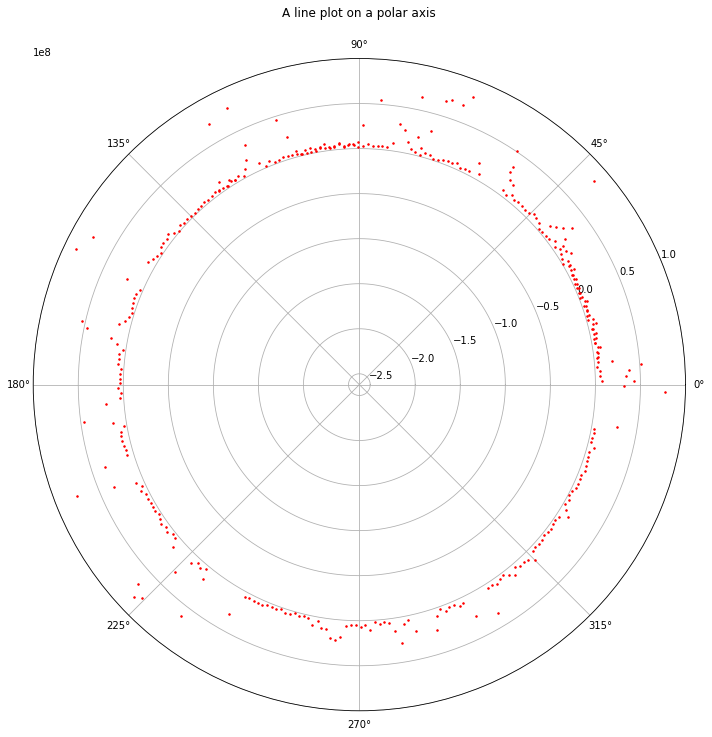

In [195]:
figsize(12,12)
ax = subplot(111, polar=True)
ax.plot(time_t, data, 'r.', ms=3)
ax.set_rmax(1e8)
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## A méréssel kapcsolatos észrevételek

__Kitölteni nem kötelező__: 
* Itt kérjük feltűntetni, hogy mennyi idő volt szükséges a feladatok elvégzéséhez. 
* Itt lehet javaslatot tenni a méréssel kapcsolatban.
* A méréssel kapcsolatban felmerült további ötletek.